In [2]:
# import spacec first
import spacec as sp

#import standard packages
import os
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

# silencing warnings
import warnings
warnings.filterwarnings('ignore')

plt.rc('axes', grid=False)  # remove gridlines
sc.settings.set_figure_params(dpi=80, facecolor='white') # set dpi and background color for scanpy figures


/dss/dsshome1/00/ge65tib2/miniconda3/envs/spacec/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
2025-06-16 17:09:02.123413: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2025-06-16 17:09:02.123481: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
INFO:root: * TissUUmaps version: 3.1.1.6


In [3]:
# Specify the path to the data
root_path = "/dss/dsshome1/00/ge65tib2/Spacec/" # replace with your path
data_path = root_path + 'example_data/raw/' # where the data is stored

# where you want to store the output
output_dir = root_path + 'example_data/output/'
os.makedirs(output_dir, exist_ok=True)

In [4]:
adata = sc.read(output_dir + 'adata_cellpose_nn_demo.h5ad')
adata # check the adata

AnnData object with n_obs × n_vars = 15385 × 39
    obs: 'DAPI', 'x', 'y', 'area', 'region_num', 'unique_region', 'condition'

In [18]:
clustering_random_seed = 8

In [33]:
marker_list = [
    'SOX2', 'FAP', 'cxcr3', 'LRRC15', 'CD20', 'CD68', 'CD45RO', 
    'CD31', 'PD-1', 'Ki67', 'Keratin 5', 'CD4', 'IFNG', 'SMA', 'CD66', 
    'Podoplanin', 'CXCR4', 'PGRN', 'Granzyme B', 'Pan-Cytokeratin', 'MARCO', 
    'CD56', 'HAS1', 'CD107a', 'b-Catenin1', 'HLA-A', 'HLA-DR', 'CD8', 'PDL1', 
    'TP63', 'GATA6', 'CD34', 'TCF-1', 'Bcl-2', 'PCNA', 'CLDN18', 'CD3e', 'MCT4', 'LAG3']

adata_louvian = sp.tl.clustering(
    adata, 
    clustering='louvain', # can choose between leiden and louvain
    n_neighbors=30, # number of neighbors for the knn graph
    resolution = 1, #clustering resolution (higher resolution gives more clusters)
    reclustering = False, # if true, no computing the neighbors
    marker_list = marker_list, #if it is None, all variable names are used for clustering
    seed=clustering_random_seed, # random seed for clustering - reproducibility
)

Computing neighbors and UMAP
- neighbors
- UMAP
Clustering
Louvain clustering


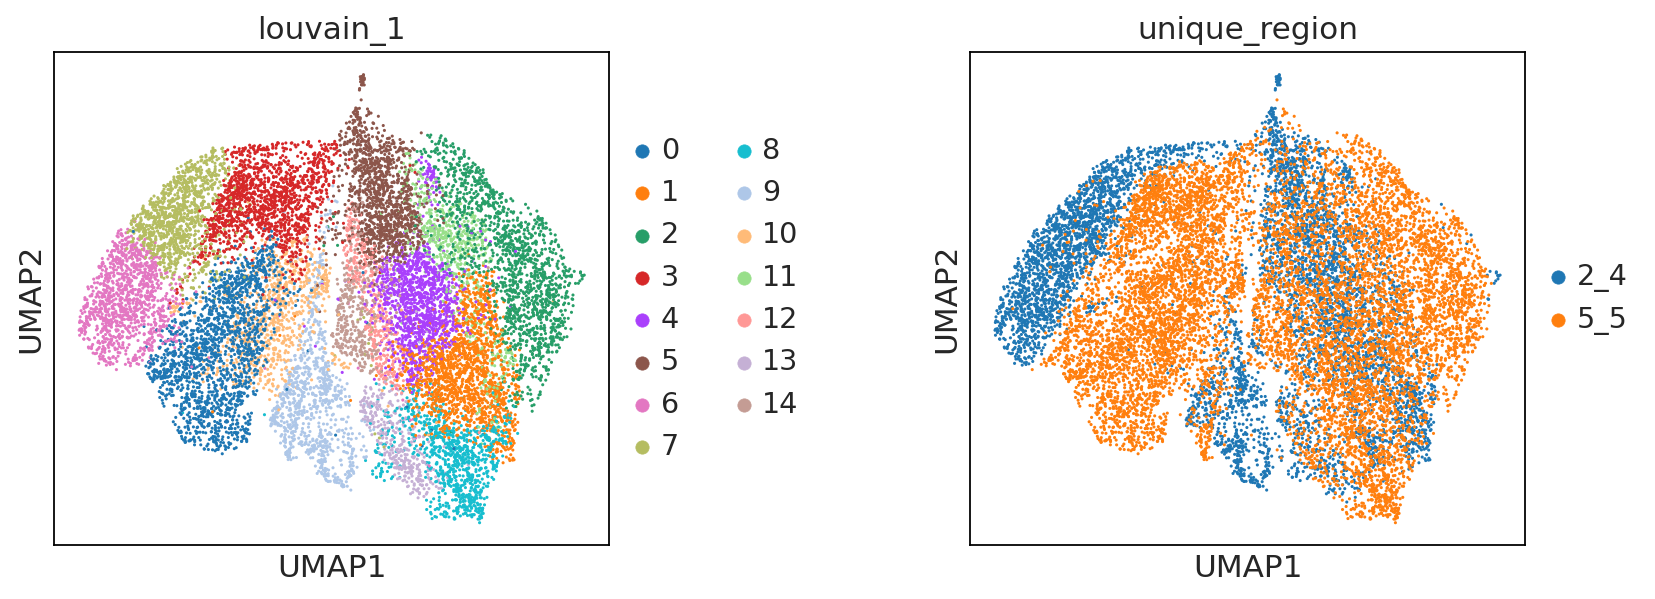

In [34]:
# visualization of clustering with UMAP
fig_1 = sc.pl.umap(adata_louvian, color = ['louvain_1', 'unique_region'], wspace=0.5, return_fig=True)
fig_1.savefig(os.path.join(output_dir, "UMAP_louvain.pdf"), dpi=300, bbox_inches='tight')

In [15]:
clustering_random_seed = 9

In [16]:
marker_list = [
    'SOX2', 'FAP', 'cxcr3', 'LRRC15', 'CD20', 'CD68', 'CD45RO', 
    'CD31', 'PD-1', 'Ki67', 'Keratin 5', 'CD4', 'IFNG', 'SMA', 'CD66', 
    'Podoplanin', 'CXCR4', 'PGRN', 'Granzyme B', 'Pan-Cytokeratin', 'MARCO', 
    'CD56', 'HAS1', 'CD107a', 'b-Catenin1', 'HLA-A', 'HLA-DR', 'CD8', 'PDL1', 
    'TP63', 'GATA6', 'CD34', 'TCF-1', 'Bcl-2', 'PCNA', 'CLDN18', 'CD3e', 'MCT4', 'LAG3']

adata_flowSOM = sp.tl.clustering(
    adata, 
    clustering='flowSOM', # can choose between leiden and louvian
    n_neighbors=10, # number of neighbors for the knn graph
    resolution = 1, #clustering resolution (higher resolution gives more clusters)
    reclustering = False, # if true, no computing the neighbors
    marker_list = marker_list, #if it is None, all variable names are used for clustering
    seed=clustering_random_seed, # random seed for clustering - reproducibility
)

Computing neighbors and UMAP
- neighbors
- UMAP
Clustering
FlowSOM clustering


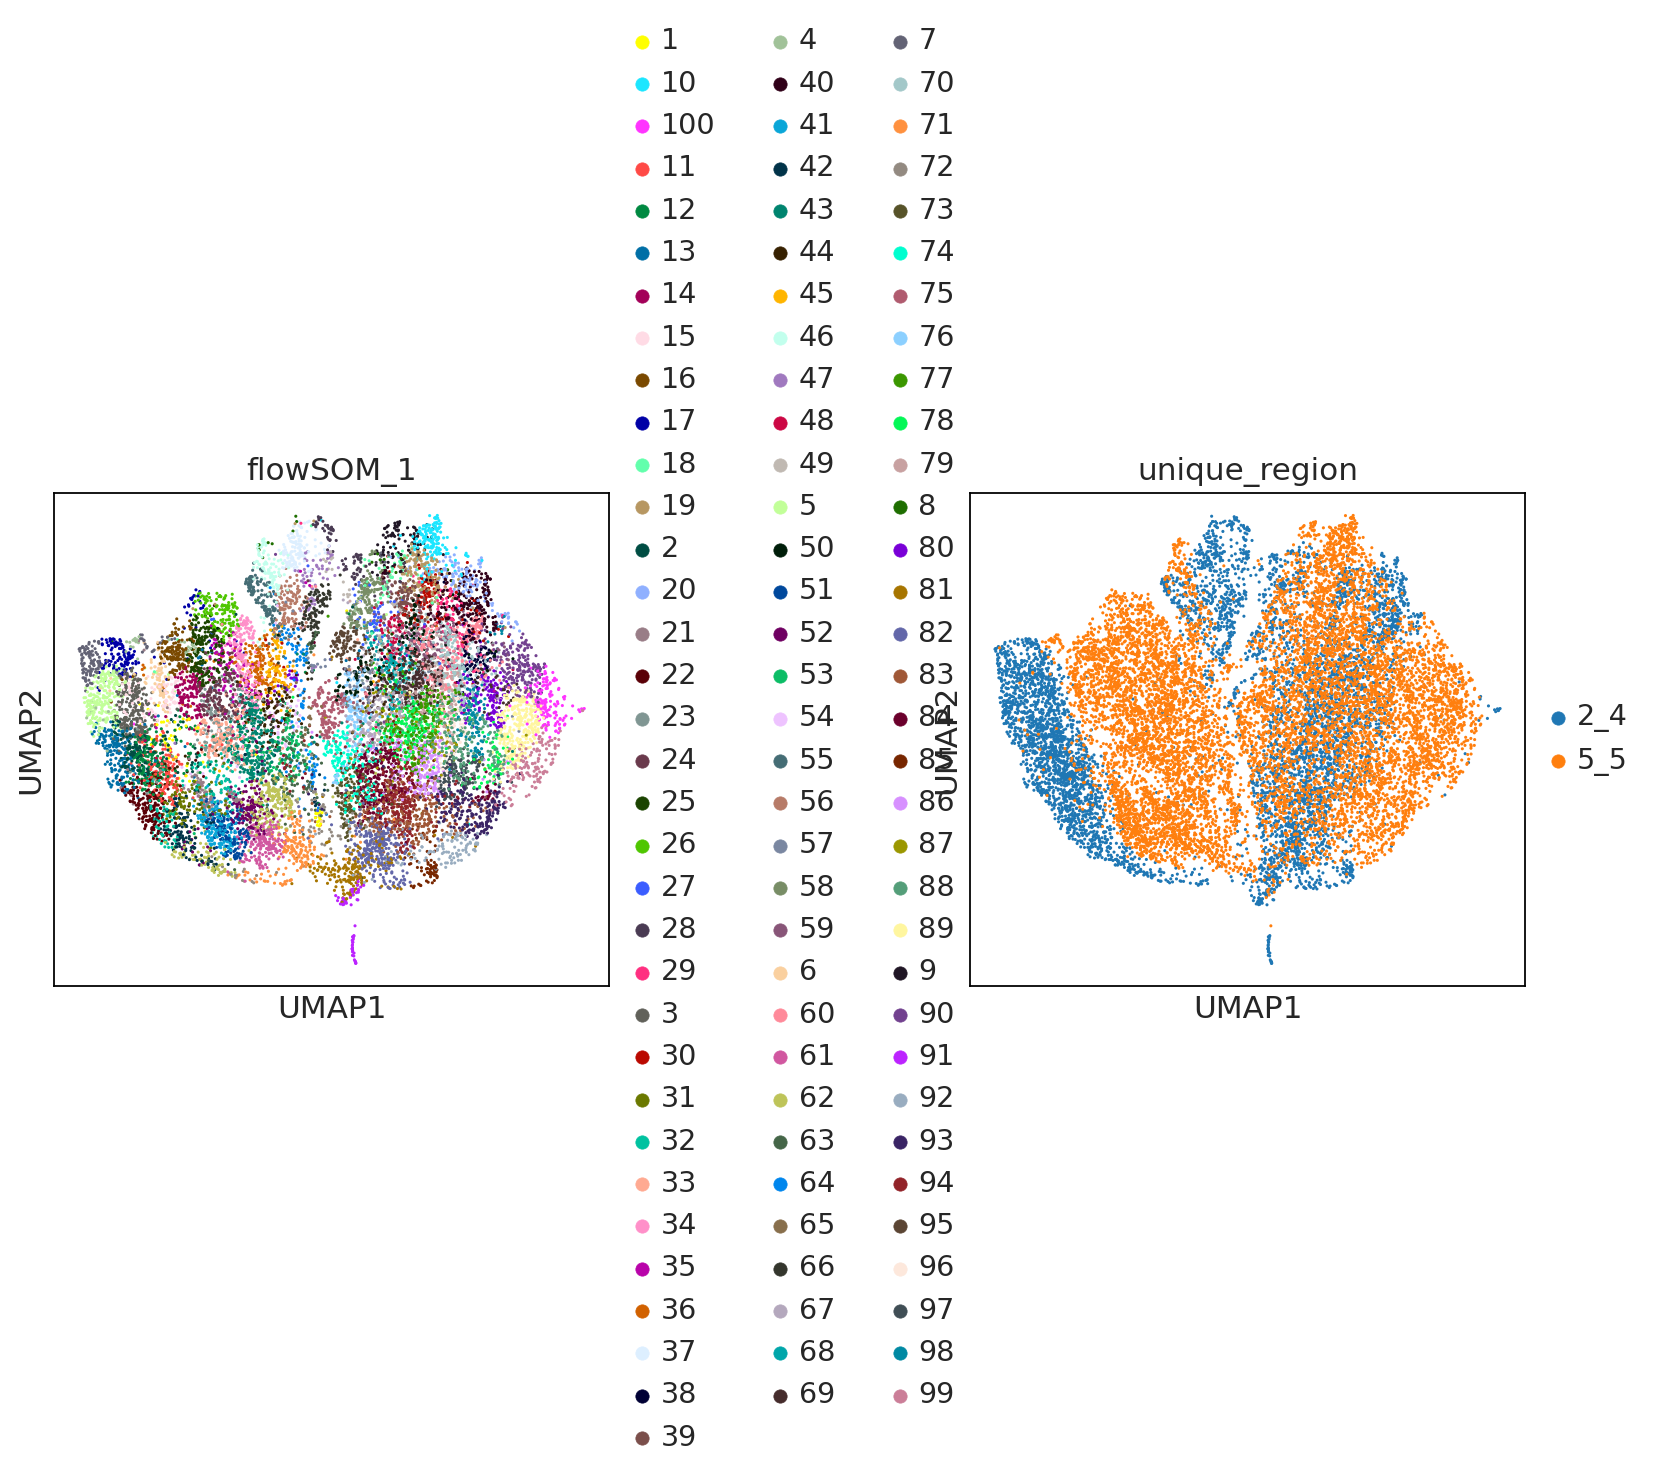

In [17]:
# visualization of clustering with UMAP
fig_2 = sc.pl.umap(adata_flowSOM, color = ['flowSOM_1', 'unique_region'], wspace=0.5, return_fig=True)
fig_2.savefig(os.path.join(output_dir, "UMAP_flowSOM.pdf"), dpi=300, bbox_inches='tight')